Quantity             Unit           
---------------------------------------
distance             AU             
angle                deg            
timescale            utc            
timeformat           None           
speed                AU / d         
rotation_period      d              
{'epoch': <Time object: scale='utc' format='jd' value=[2459305.5 2459305.5 2459305.5]>, 'name': array(['9449908454', '0178543056', '2888657971'], dtype='<U10'), 'H0': array([8.28538158, 5.81819312, 7.74693   ]), 'G': array([0.15, 0.15, 0.15]), 'rotation_period': array([0.5188487 , 0.51050171, 0.86313408]), 'delta_H': array([0.48563999, 0.37275011, 0.22715002]), 'phi0': <Angle [108.16764649, 359.16074128,  77.78850026] deg>, 't0': <Time object: scale='utc' format='jd' value=[2459305.5 2459305.5 2459305.5]>, '_a': <Distance [45.92179474, 77.84150776, 88.47484025] AU>, '_e': array([0.32439595, 0.03929774, 0.11254216]), '_inc': <Angle [51.00504691, 69.21438491, 81.02690761] deg>, '_node': <Angle 

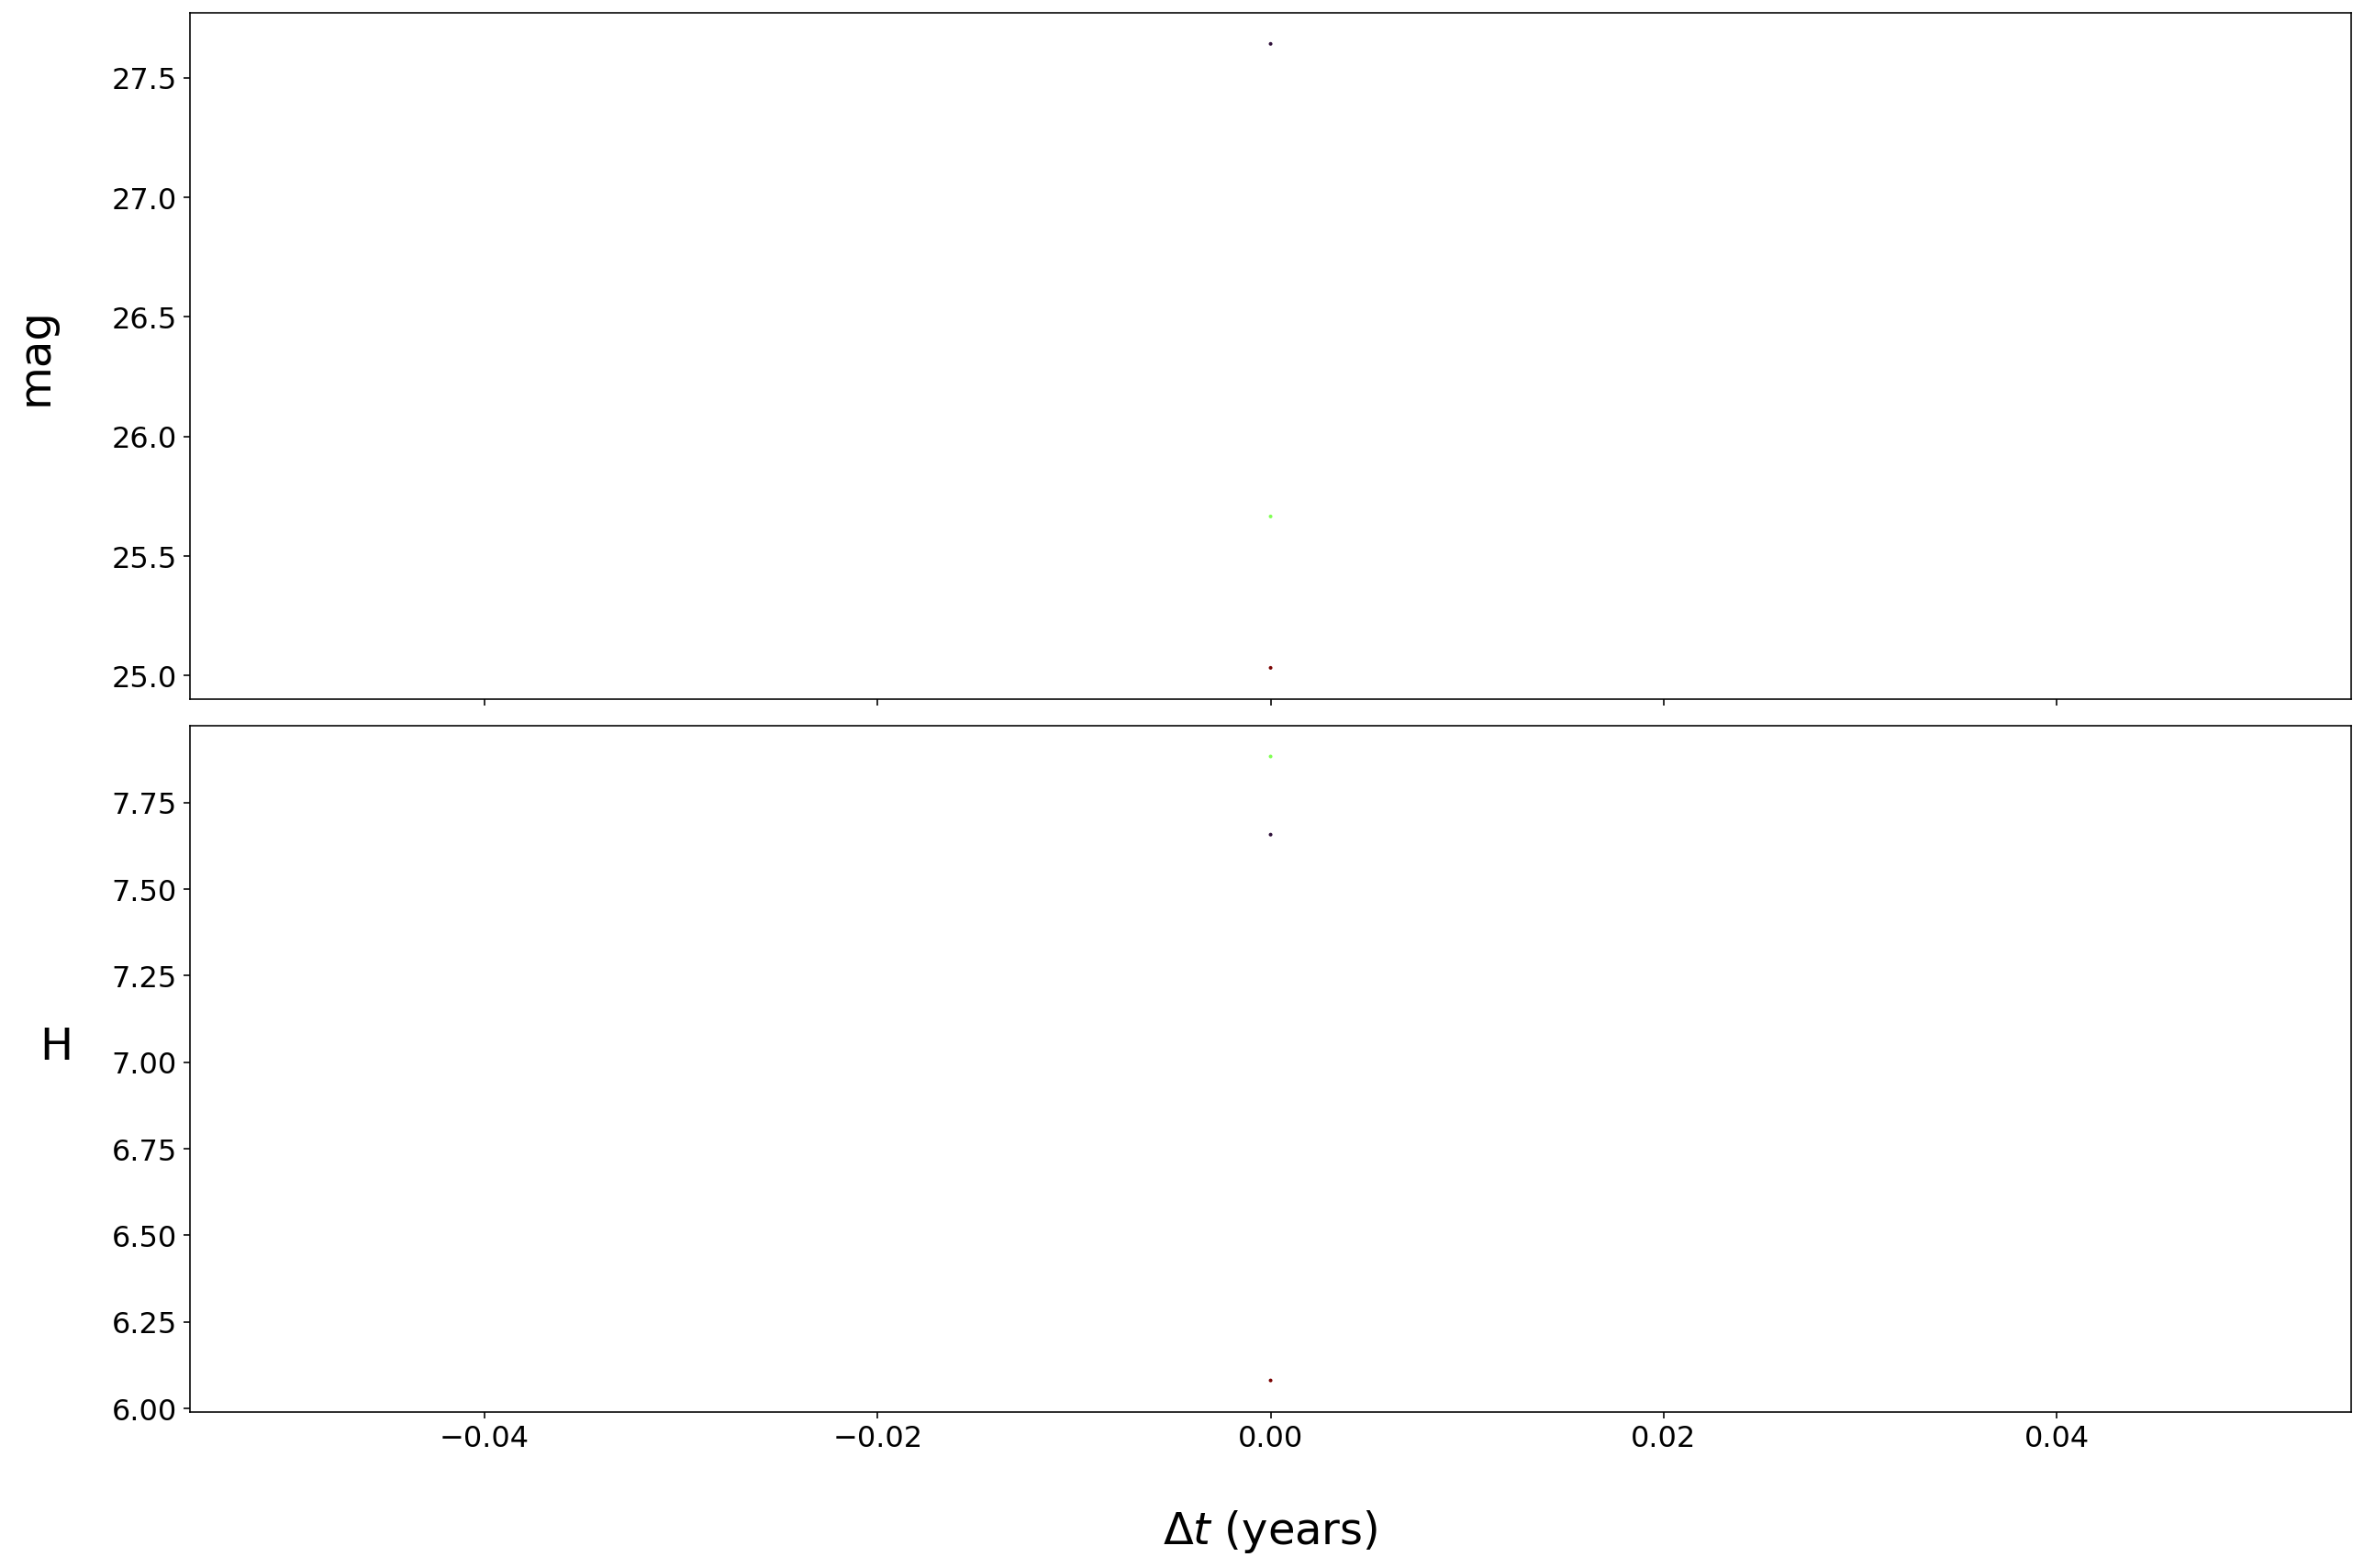

In [2]:
from spacerocks import SpaceRock, Units
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

units = Units()
units.current()

N = 3
rocks = SpaceRock(a=np.random.uniform(30, 100, N), 
                  e=np.random.rand(N) * 0.5, 
                  inc=np.random.uniform(0, 90, N), 
                  node=np.random.uniform(0, 360, N), 
                  arg=np.random.uniform(0, 360, N), 
                  M=np.random.uniform(0, 360, N), 
                  epoch=np.repeat(2459305.5, N), 
                  H0=np.random.uniform(4, 10, N),
                  delta_H = np.random.uniform(0.1, 0.5, N),
                  rotation_period = np.random.uniform(0.2, 1, N),
                  phi0 = np.random.rand(N) * 360,
                  frame='barycentric',
                  units=units)

p = rocks.propagate(epochs=2459305.5, model=2)
o = p.observe(obscode='W84')

colors = [float(hash(s) % 256) / 256 for s in o.name]

fig, ax = plt.subplots(2, 1, figsize=(18, 12), sharex=True)
ax[0].scatter((o.epoch.jd - o.epoch.jd[0]) / 365.25, o.mag, s=1, c=colors, cmap='turbo')
ax[0].tick_params(labelsize=16)
ax[0].set_ylabel('mag', fontsize=24, labelpad=30)

ax[1].scatter((o.epoch.jd - o.epoch.jd[0]) / 365.25, o.H, s=1, c=colors, cmap='turbo')
ax[1].tick_params(labelsize=16)
ax[1].set_xlabel(r'$\Delta t$ (years)', fontsize=24, labelpad=30)
ax[1].set_ylabel('H', fontsize=24, labelpad=30, rotation=0)

fig.tight_layout()

In [ ]:
np.ones(100) * rocks.epoch.jd

In [ ]:
np.atleast_1d(10)

In [ ]:
len(rocks.epoch.jd)

In [ ]:
from spacerocks import SpaceRock, Units

In [ ]:
spacerocks.__version__

In [ ]:
dict = {'name':rocks.name, 
        'epoch':rocks.epoch, 
        'a':rocks.a.au, 
        'e':rocks.e, 
        'inc':rocks.inc.deg, 
        'node':rocks.node.deg, 
        'arg':rocks.arg.deg,
        'M':rocks.M.deg,
        'H0':rocks.H0,
        'delta_H':rocks.delta_H,
        'rotation_period':rocks.rotation_period,
        'phi0':rocks.phi0.deg}
df = pd.DataFrame.from_dict(dict)

In [ ]:
df

In [ ]:
import spacerocks

In [ ]:
spacerocks.__version__

In [ ]:
from spacerocks import SpaceRock, Units

In [ ]:
units.angle = 'rad'

In [ ]:
units.current()

In [ ]:
import pandas as pd
from astropy import units as u
dict = {'name':o.name, 
        'epoch':o.epoch, 
        'ra':o.ra.deg, 
        'dec':o.dec.deg, 
        'ra_rate':o.ra_rate.to(u.deg/u.day), 
        'dec_rate':o.dec_rate.to(u.deg/u.day), 
        'mag':o.mag,
        'H':o.H}
df = pd.DataFrame.from_dict(dict)

In [ ]:
df

In [ ]:
o.dec_rate

In [ ]:
N = 10
rock = SpaceRock(a=np.random.uniform(30, 100, N), 
                 e=np.random.rand(N), 
                 inc=np.random.uniform(0, 90, N), 
                 node=np.random.uniform(0, 360, N), 
                 arg=np.random.uniform(0, 360, N), 
                 M=np.random.uniform(0, 360, N), 
                 epoch=np.repeat(2459305.5, N), 
                 H0=np.random.uniform(4, 10, N),
                 delta_H = np.random.uniform(0.1, 0.5, N), # amplitude
                 rotation_period = np.random.uniform(0.2, 1, N), # period in days
                 phi0 = np.random.rand(N) * 360, # initial phase in radians
                 frame='barycentric',
                 units=units)

p = rock.propagate(epochs=np.linspace(2459305.5, 2499955.5, 10000), model=2)
o = p.observe(obscode='W84')

colors = [float(hash(s) % 256) / 256 for s in o.name]

fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter((o.epoch.jd - o.epoch.jd[0]) / 365.25, o.mag, s=1, c=colors, cmap='turbo')
ax.tick_params(labelsize=16)
ax.set_xlabel(r'$\Delta t$ (years)', fontsize=24, labelpad=30)
ax.set_ylabel('mag', fontsize=24, labelpad=30)

fig, ax = plt.subplots(figsize=(18, 6))
ax.scatter((o.epoch.jd - o.epoch.jd[0]) / 365.25, o.H, s=1, c=colors, cmap='turbo')
ax.tick_params(labelsize=16)
ax.set_xlabel(r'$\Delta t$ (years)', fontsize=24, labelpad=30)
ax.set_ylabel('H', fontsize=24, labelpad=30, rotation=0)

In [ ]:
N = 1
rock = SpaceRock(a=30, 
                 e=0, 
                 inc=0, 
                 node=0, 
                 arg=0, 
                 M=0, 
                 H=5,
                 delta_H=np.array([0.5]),
                 phi0=np.array([0]),
                 rotation_period=np.array([0.25]),
                 epoch=np.repeat(2459305.5, N), 
                 frame='barycentric', units=units)

In [ ]:
pr = rock.propagate(epochs=np.linspace(2459305.5, 2459355.5, 50), model=2)

In [ ]:
fig, ax = plt.subplots(figsize=(18, 18))

true = []
estimated = []
elong = []

N = 10000000
rock = SpaceRock(a=np.random.uniform(30, 500, N), 
                 e=np.random.rand(N), 
                 inc=np.random.uniform(0, 90, N), 
                 node=np.random.uniform(0, 360, N), 
                 arg=np.random.uniform(0, 360, N), 
                 M=np.random.uniform(0, 360, N), 
                 epoch=np.repeat(2459305.5, N), 
                 frame='barycentric', units=units)


t0 = ts.tdb(jd=rock.epoch.tdb.jd)
t1 = ts.tdb(jd=rock.epoch.tdb.jd + 4/24)
earth = planets['earth']

# Only used for the topocentric calculation.
#if self.__class__.obscode != 500:
#    earth += Topos(latitude_degrees=self.__class__.obslat,
#                   longitude_degrees=self.__class__.obslon,
#                   elevation_m=self.__class__.obselev) # topocentric calculation

e0 = earth.at(t0)
e1 = earth.at(t1)
x0, y0, z0 = e0.ecliptic_xyz().au
x1, y1, z1 = e1.ecliptic_xyz().au

d_earth = sqrt((x1 - x0)**2 + (y1 - y0)**2 + (z1 - z0)**2)

obs = Observe(rock)

rate = sqrt(obs.ra_rate.to(u.arcsec/u.hour)**2 * cos(obs.dec)**2 + obs.dec_rate.to(u.arcsec/u.hour)**2)

estimated.append(d_earth / tan(rate * 4 *u.h))
true.append(sqrt(obs.xT.au**2 + obs.yT.au**2 + obs.zT.au**2))
    
true = array(true)
estimated = array(estimated)

error = abs(true - estimated) / true
    


In [ ]:
fig, ax = plt.subplots(figsize=(18, 18))

sc = ax.scatter(obs.elong.deg, error, alpha=0.01, s=1, color='black')
    

ax.tick_params(labelsize=14)
ax.set_xlabel('elongation', fontsize=24, labelpad=20)
ax.set_ylabel('Distance Relative Error', fontsize=24, labelpad=20)
ax.set_xlim([0, 180]);
ax.set_ylim([0.001, 1])
ax.set_yscale('log');